# The Steph Effect

#### Steph Curry is widely considered the greatest shooter of all time. The purpose of this project is to quickly analyze the effect Steph Curry has had on the NBA in terms of shooting.

First let's load in the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Next, we load in data from Basketball Reference. For ease, the data has been pre-downloaded as excel files.

In [2]:
league_df = pd.read_excel('league_averages.xlsx')     # NBA Stats
warriors_df = pd.read_excel('gsw_averages.xlsx')      # Golden State Warriors Stats
steph_df = pd.read_excel('stephcurry_averages.xlsx')  # Stephen Curry Stats

Let's take a look at the data we are dealing with:

In [3]:
league_df.head()

,Rk,Season,Lg,Age,Ht,Wt,G,MP,FG,FGA,...,PTS,FG%,3P%,FT%,Pace,eFG%,TOV%,ORB%,FT/FGA,ORtg
0,1,2018-19,NBA,26.5,2018-06-07,218.0,377,241.7,40.8,88.9,...,110.4,0.459,0.350,0.764,100.0,0.520,12.6,23.1,0.201,109.7
1,2,2017-18,NBA,26.4,2018-06-07,219.0,1230,241.4,39.6,86.1,...,106.3,0.460,0.362,0.767,97.3,0.521,13.0,22.3,0.193,108.6
2,3,2016-17,NBA,26.6,2018-06-07,220.0,1230,241.6,39.0,85.4,...,105.6,0.457,0.358,0.772,96.4,0.514,12.7,23.3,0.209,108.8
3,4,2015-16,NBA,26.7,2018-06-07,221.0,1230,241.8,38.2,84.6,...,102.7,0.452,0.354,0.757,95.8,0.502,13.2,23.8,0.209,106.4
4,5,2014-15,NBA,26.7,2018-06-07,222.0,1230,242.0,37.5,83.6,...,100.0,0.449,0.350,0.750,93.9,0.496,13.3,25.1,0.205,105.6


In [4]:
warriors_df.head()

,Season,Lg,Tm,W,L,Finish,Unnamed: 6,Age,Ht.,Wt.,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2018-19,NBA,GSW,18,9,1,NaN,28.1,2018-06-07,218.0,...,0.826,9.6,35.8,45.4,28.0,7.2,6.3,14.6,22.2,116.4
1,2017-18,NBA,GSW,58,24,1,NaN,28.8,2018-06-07,221.0,...,0.815,8.4,35.1,43.5,29.3,8.0,7.5,15.5,19.6,113.5
2,2016-17,NBA,GSW,67,15,1,NaN,28.2,2018-06-07,219.0,...,0.788,9.4,35.0,44.4,30.4,9.6,6.8,14.8,19.3,115.9
3,2015-16,NBA,GSW,73,9,1,NaN,27.4,2018-06-06,213.0,...,0.763,10.0,36.2,46.2,28.9,8.4,6.1,15.2,20.7,114.9
4,2014-15,NBA,GSW,67,15,1,NaN,26.6,2018-06-07,212.0,...,0.768,10.4,34.3,44.7,27.4,9.3,6.0,14.5,19.9,110.0


In [5]:
pd.set_option('display.max_columns', 100)
steph_df.head()

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2009-10,21.0,GSW,NBA,PG,80,77,36.2,6.6,14.3,0.462,2.1,4.8,0.437,4.5,9.5,0.474,0.535,2.2,2.5,0.885,0.6,3.9,4.5,5.9,1.9,0.2,3.0,3.2,17.5
1,2010-11,22.0,GSW,NBA,PG,74,74,33.6,6.8,14.2,0.480,2.0,4.6,0.442,4.8,9.6,0.498,0.551,2.9,3.1,0.934,0.7,3.2,3.9,5.8,1.5,0.3,3.1,3.1,18.6
2,2011-12,23.0,GSW,NBA,PG,26,23,28.2,5.6,11.4,0.490,2.1,4.7,0.455,3.5,6.7,0.514,0.583,1.5,1.8,0.809,0.6,2.8,3.4,5.3,1.5,0.3,2.5,2.4,14.7
3,2012-13,24.0,GSW,NBA,PG,78,78,38.2,8.0,17.8,0.451,3.5,7.7,0.453,4.5,10.1,0.449,0.549,3.4,3.7,0.900,0.8,3.3,4.0,6.9,1.6,0.2,3.1,2.5,22.9
4,2013-14,25.0,GSW,NBA,PG,78,78,36.5,8.4,17.7,0.471,3.3,7.9,0.424,5.0,9.8,0.509,0.566,3.9,4.5,0.885,0.6,3.7,4.3,8.5,1.6,0.2,3.8,2.5,24.0


It looks like Steph has been in the league since the 2009-10 season. For this first example, let's take a look at Steph's 3PA per game vs. The Warriors vs. The NBA:

In [6]:
# Get the Columns we want
league_df.set_index('Season', inplace = True)
league_df1 = league_df[['3P','3PA']]
league_df1 = league_df1.iloc[1:10] #Only 2009-2018 seasons
league_df1.sort_index(inplace=True)

warriors_df.set_index('Season', inplace = True)
warriors_df1 = warriors_df[['3P','3PA']]
warriors_df1 = warriors_df1.iloc[1:10] #Only 2009-2018 seasons
warriors_df1.sort_index(inplace=True)

steph_df.set_index('Season', inplace = True)
steph_df1 = steph_df[['3P','3PA']]
steph_df1 = steph_df1.iloc[0:9]
steph_df1.sort_index(inplace=True)

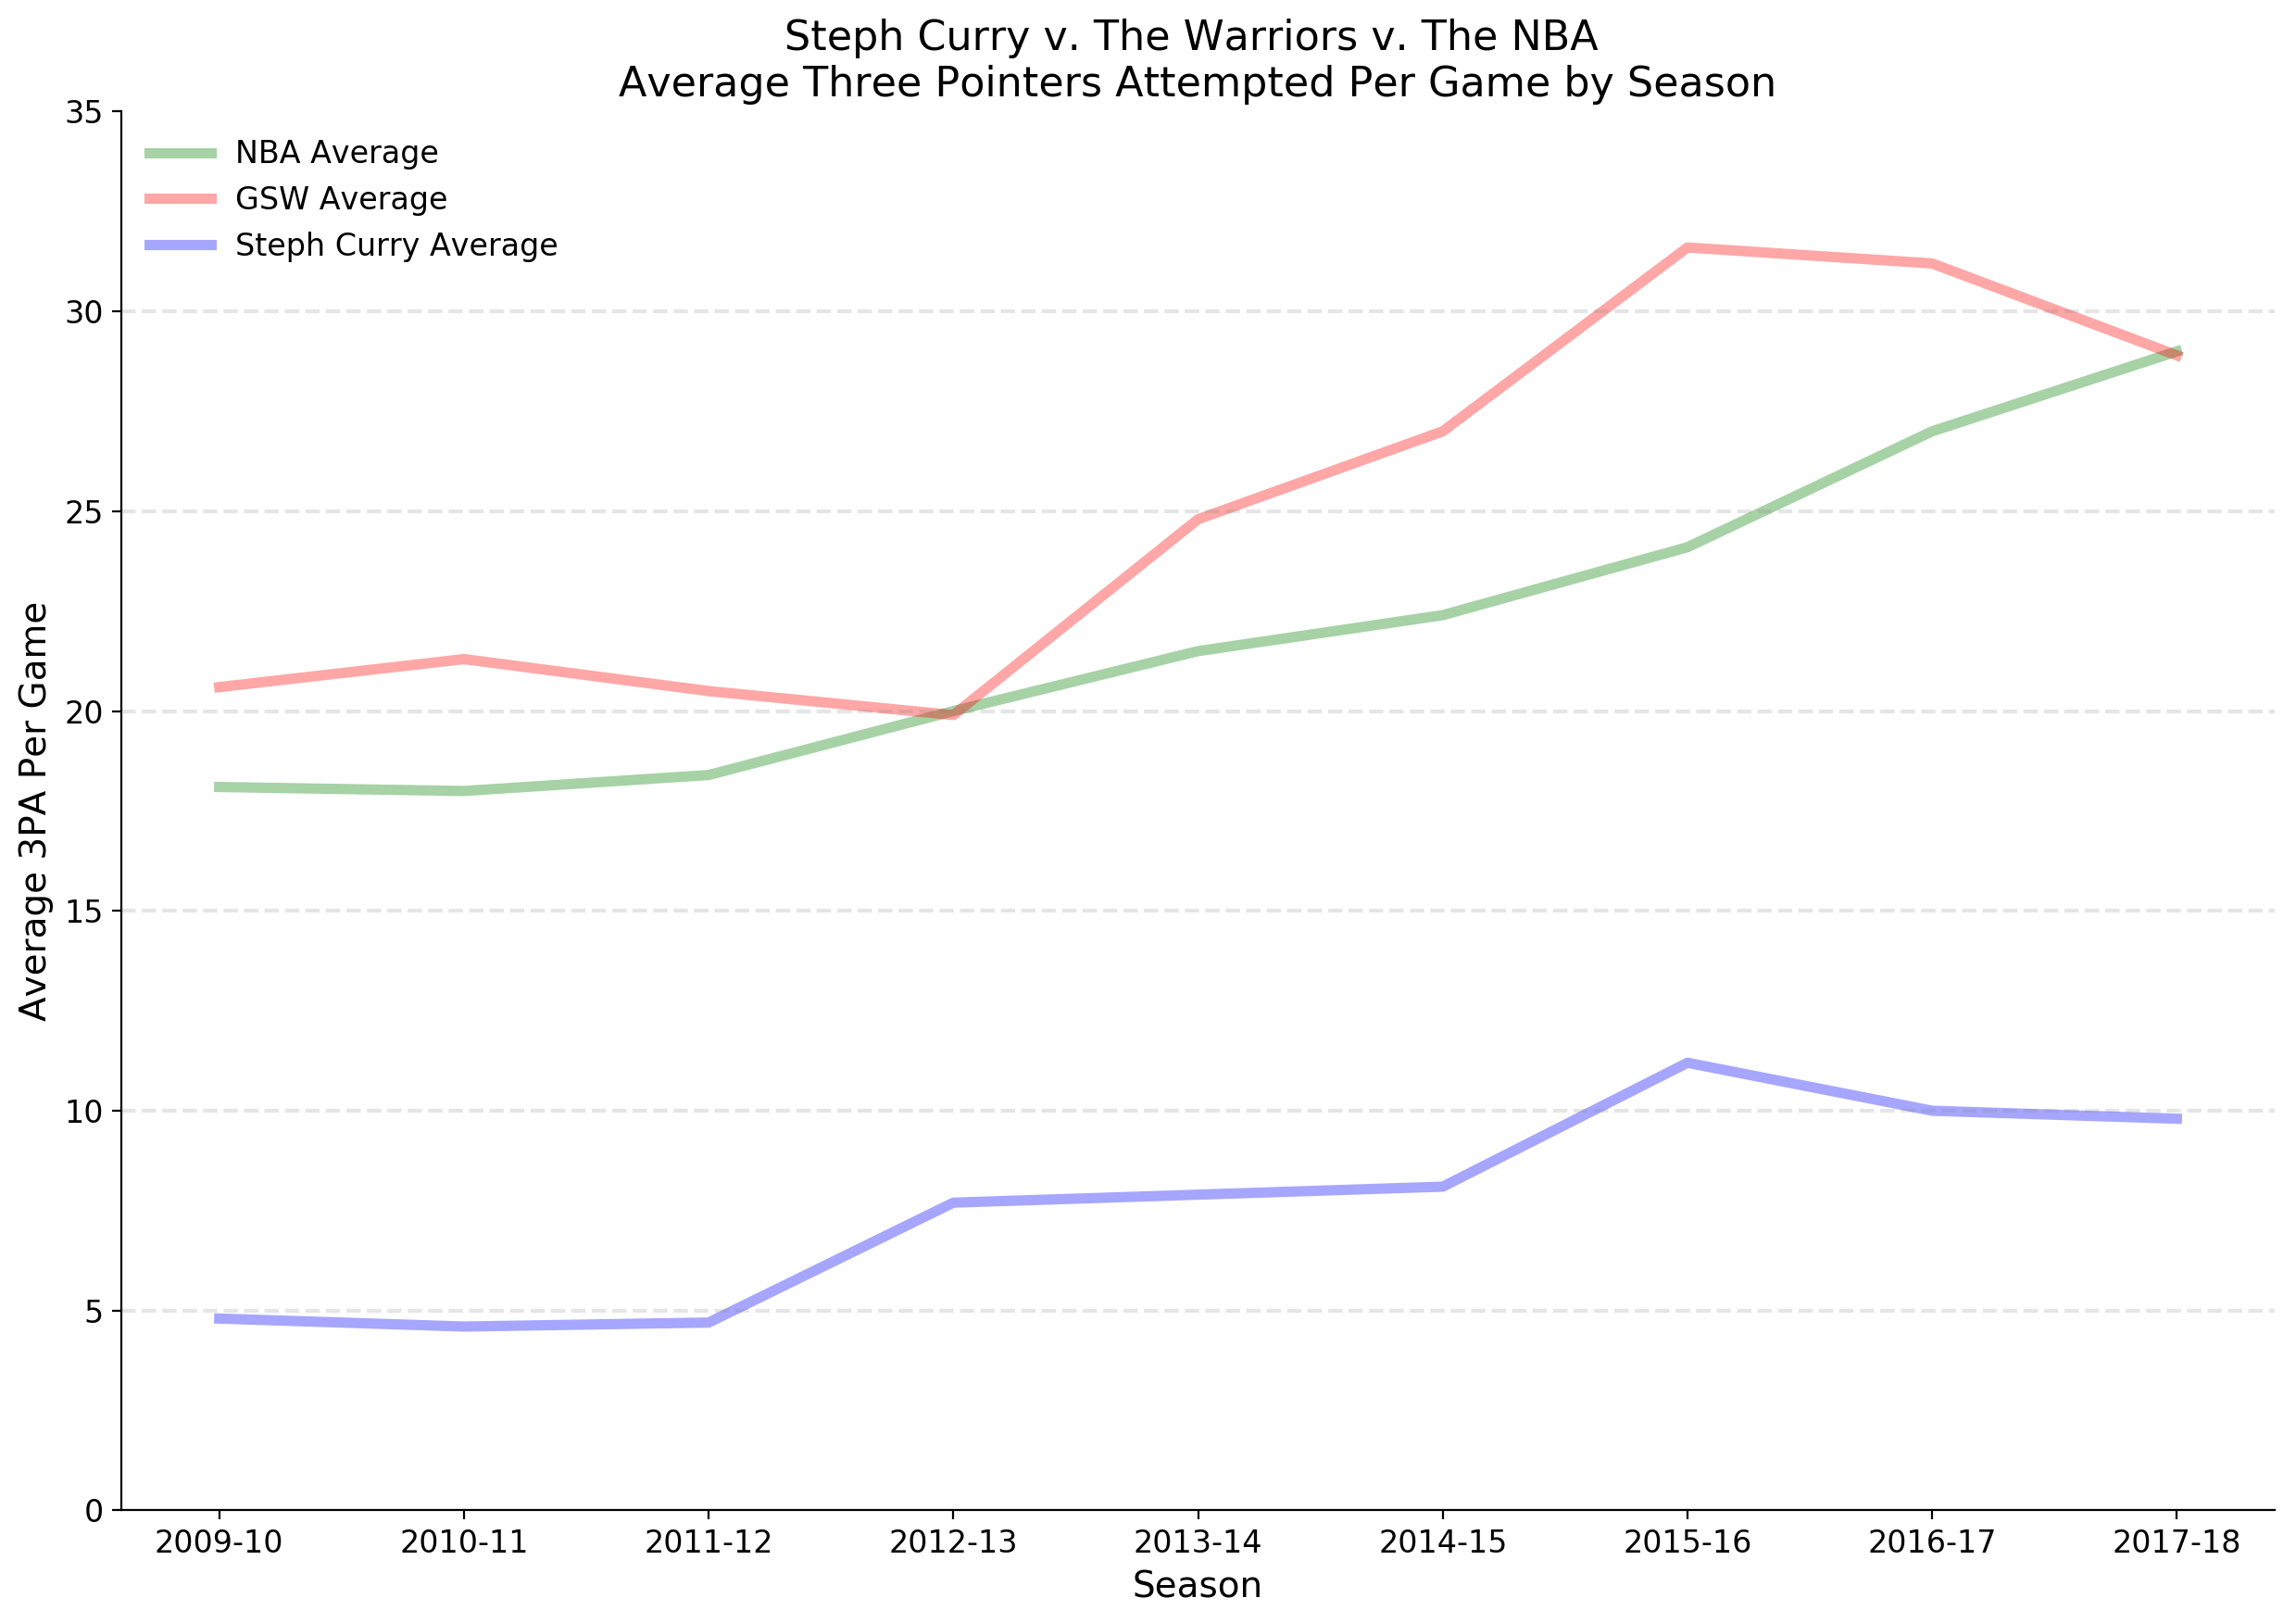

In [7]:
# Let's Plot!
plt.figure(figsize=(15,10), dpi= 200 )


plt.plot(league_df1['3PA'], 'g', alpha = 0.35, label = 'NBA Average', linewidth = 4)
plt.plot(warriors_df1['3PA'], 'r', alpha = 0.35, label = 'GSW Average', linewidth = 4)
plt.plot(steph_df1['3PA'], 'b', alpha = 0.35, label = 'Steph Curry Average', linewidth = 4)

plt.legend(loc = 'upper left',frameon = False, fontsize = 12)
plt.title('Steph Curry v. The Warriors v. The NBA \nAverage Three Pointers Attempted Per Game by Season', fontsize = 16)
plt.xlabel('Season', fontsize = 14)
plt.ylabel('Average 3PA Per Game', fontsize = 14)
plt.ylim([0, 32])
plt.yticks(np.arange(0, 40, 5), fontsize = 12)
plt.xticks(fontsize = 12)
for y in range(5, 35, 5):    
    plt.axhline(y=y, color='grey',alpha = .2, linestyle='--') 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

Overall, there seems to be a positive correlation with Steph's 3PA per game, the Warriors 3PA per game and the NBA's 3PA per game. Next, let's take a look at the trend of 2PA per game during the same timeframe.

In [8]:
# Create a 2P and 2PA per game column in league data frame
league_df['2P'] = league_df['FG'] - league_df['3P']
league_df['2PA'] = league_df['FGA'] - league_df['3PA']

In [9]:
# Get the Columns we want
league_df2 = league_df[['2P','2PA']]
league_df2 = league_df2.iloc[1:10] #Only 2009-2018 seasons
league_df2.sort_index(inplace=True)

warriors_df2 = warriors_df[['2P','2PA']]
warriors_df2 = warriors_df2.iloc[1:10] #Only 2009-2018 seasons
warriors_df2.sort_index(inplace=True)

steph_df2 = steph_df[['2P','2PA']]
steph_df2 = steph_df2.iloc[0:9]
steph_df2.sort_index(inplace=True)

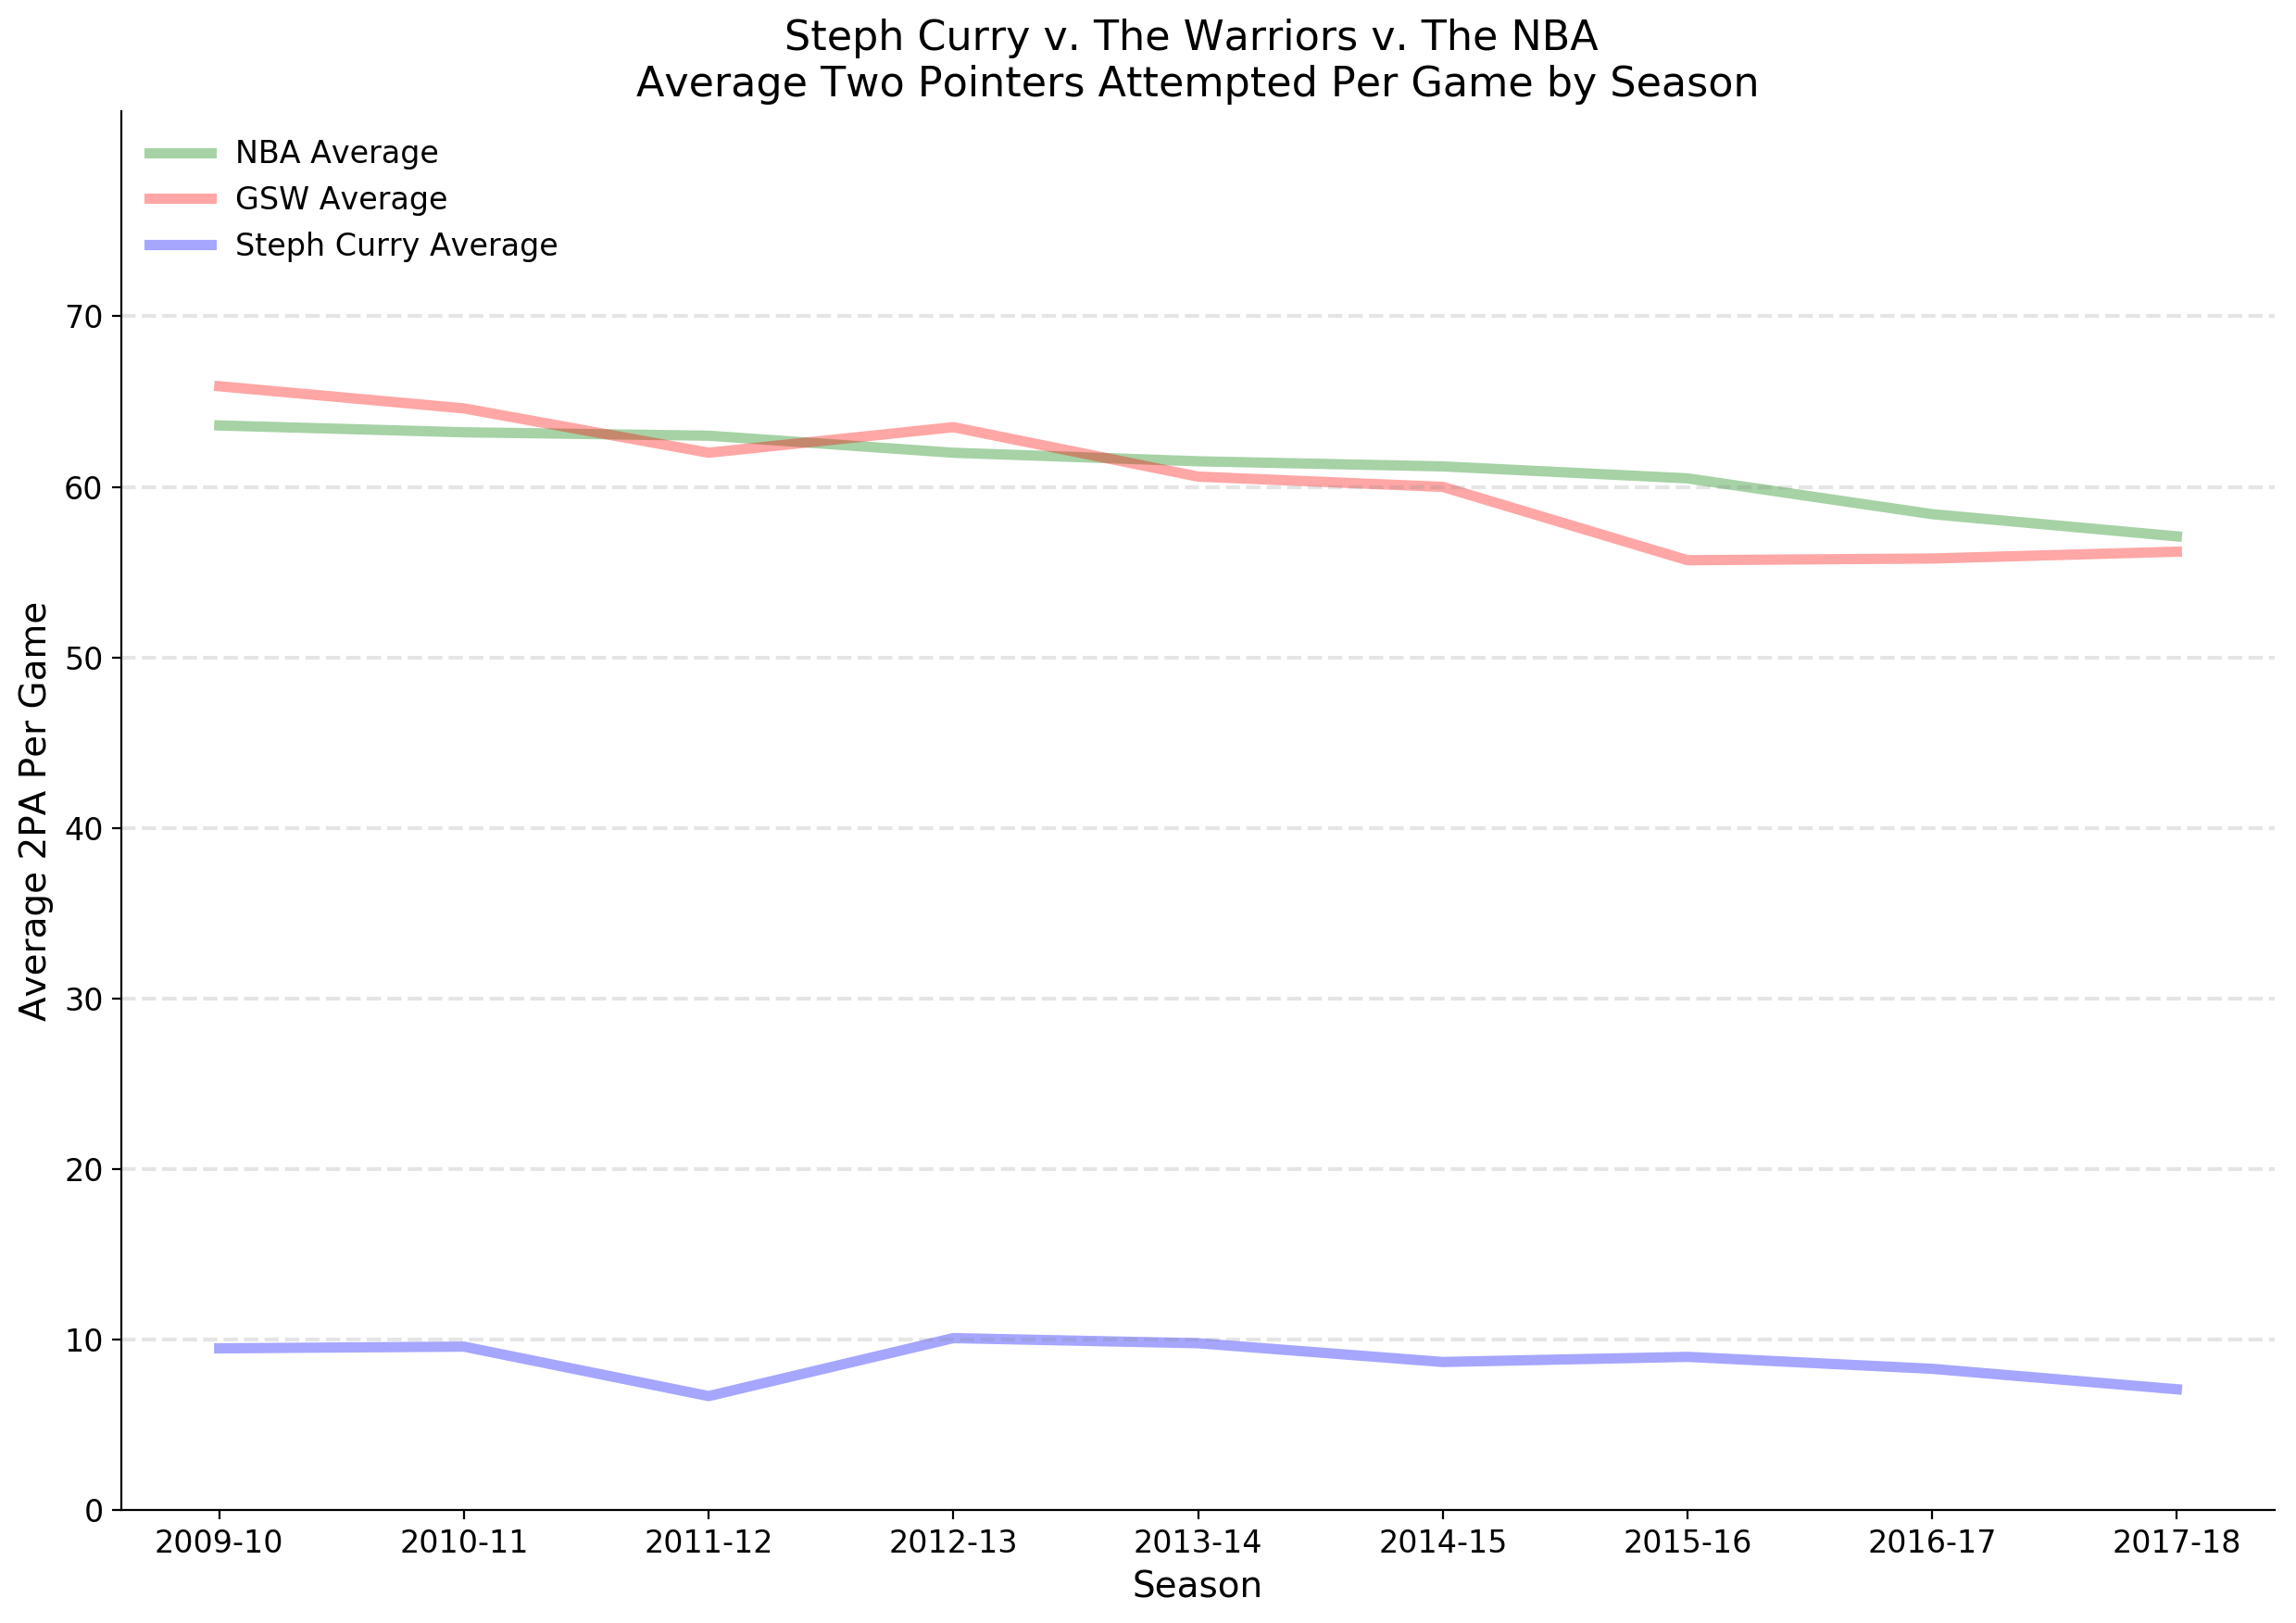

In [10]:
# Let's Plot!
plt.figure(figsize=(15,10), dpi= 200 )


plt.plot(league_df2['2PA'], 'g', alpha = 0.35, label = 'NBA Average', linewidth = 4)
plt.plot(warriors_df2['2PA'], 'r', alpha = 0.35, label = 'GSW Average', linewidth = 4)
plt.plot(steph_df2['2PA'], 'b', alpha = 0.35, label = 'Steph Curry Average', linewidth = 4)

plt.legend(loc = 'upper left',frameon = False, fontsize = 12)
plt.title('Steph Curry v. The Warriors v. The NBA \nAverage Two Pointers Attempted Per Game by Season', fontsize = 16)
plt.xlabel('Season', fontsize = 14)
plt.ylabel('Average 2PA Per Game', fontsize = 14)
plt.ylim([0, 82])
plt.yticks(np.arange(0, 75, 10), fontsize = 12)
plt.xticks(fontsize = 12)
for y in range(10, 75, 10):    
    plt.axhline(y=y, color='grey',alpha = .2, linestyle='--') 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

The NBA and Golden State Wariror's 2PA per game seem to be decreasing while Steph's 2PA per game have stayed mostly consistent for the last couple of seasons. Lastly let's take a look at the FG% trend over the same time frame.

In [11]:
# Get the Columns we want
league_df3 = league_df[['FT','FTA', 'FT%']]
league_df3 = league_df3.iloc[1:10] #Only 2009-2018 seasons
league_df3.sort_index(inplace=True)

warriors_df3 = warriors_df[['FT','FTA', 'FT%']]
warriors_df3 = warriors_df3.iloc[1:10] #Only 2009-2018 seasons
warriors_df3.sort_index(inplace=True)

steph_df3 = steph_df[['FT','FTA', 'FT%']]
steph_df3 = steph_df3.iloc[0:9]
steph_df3.sort_index(inplace=True)

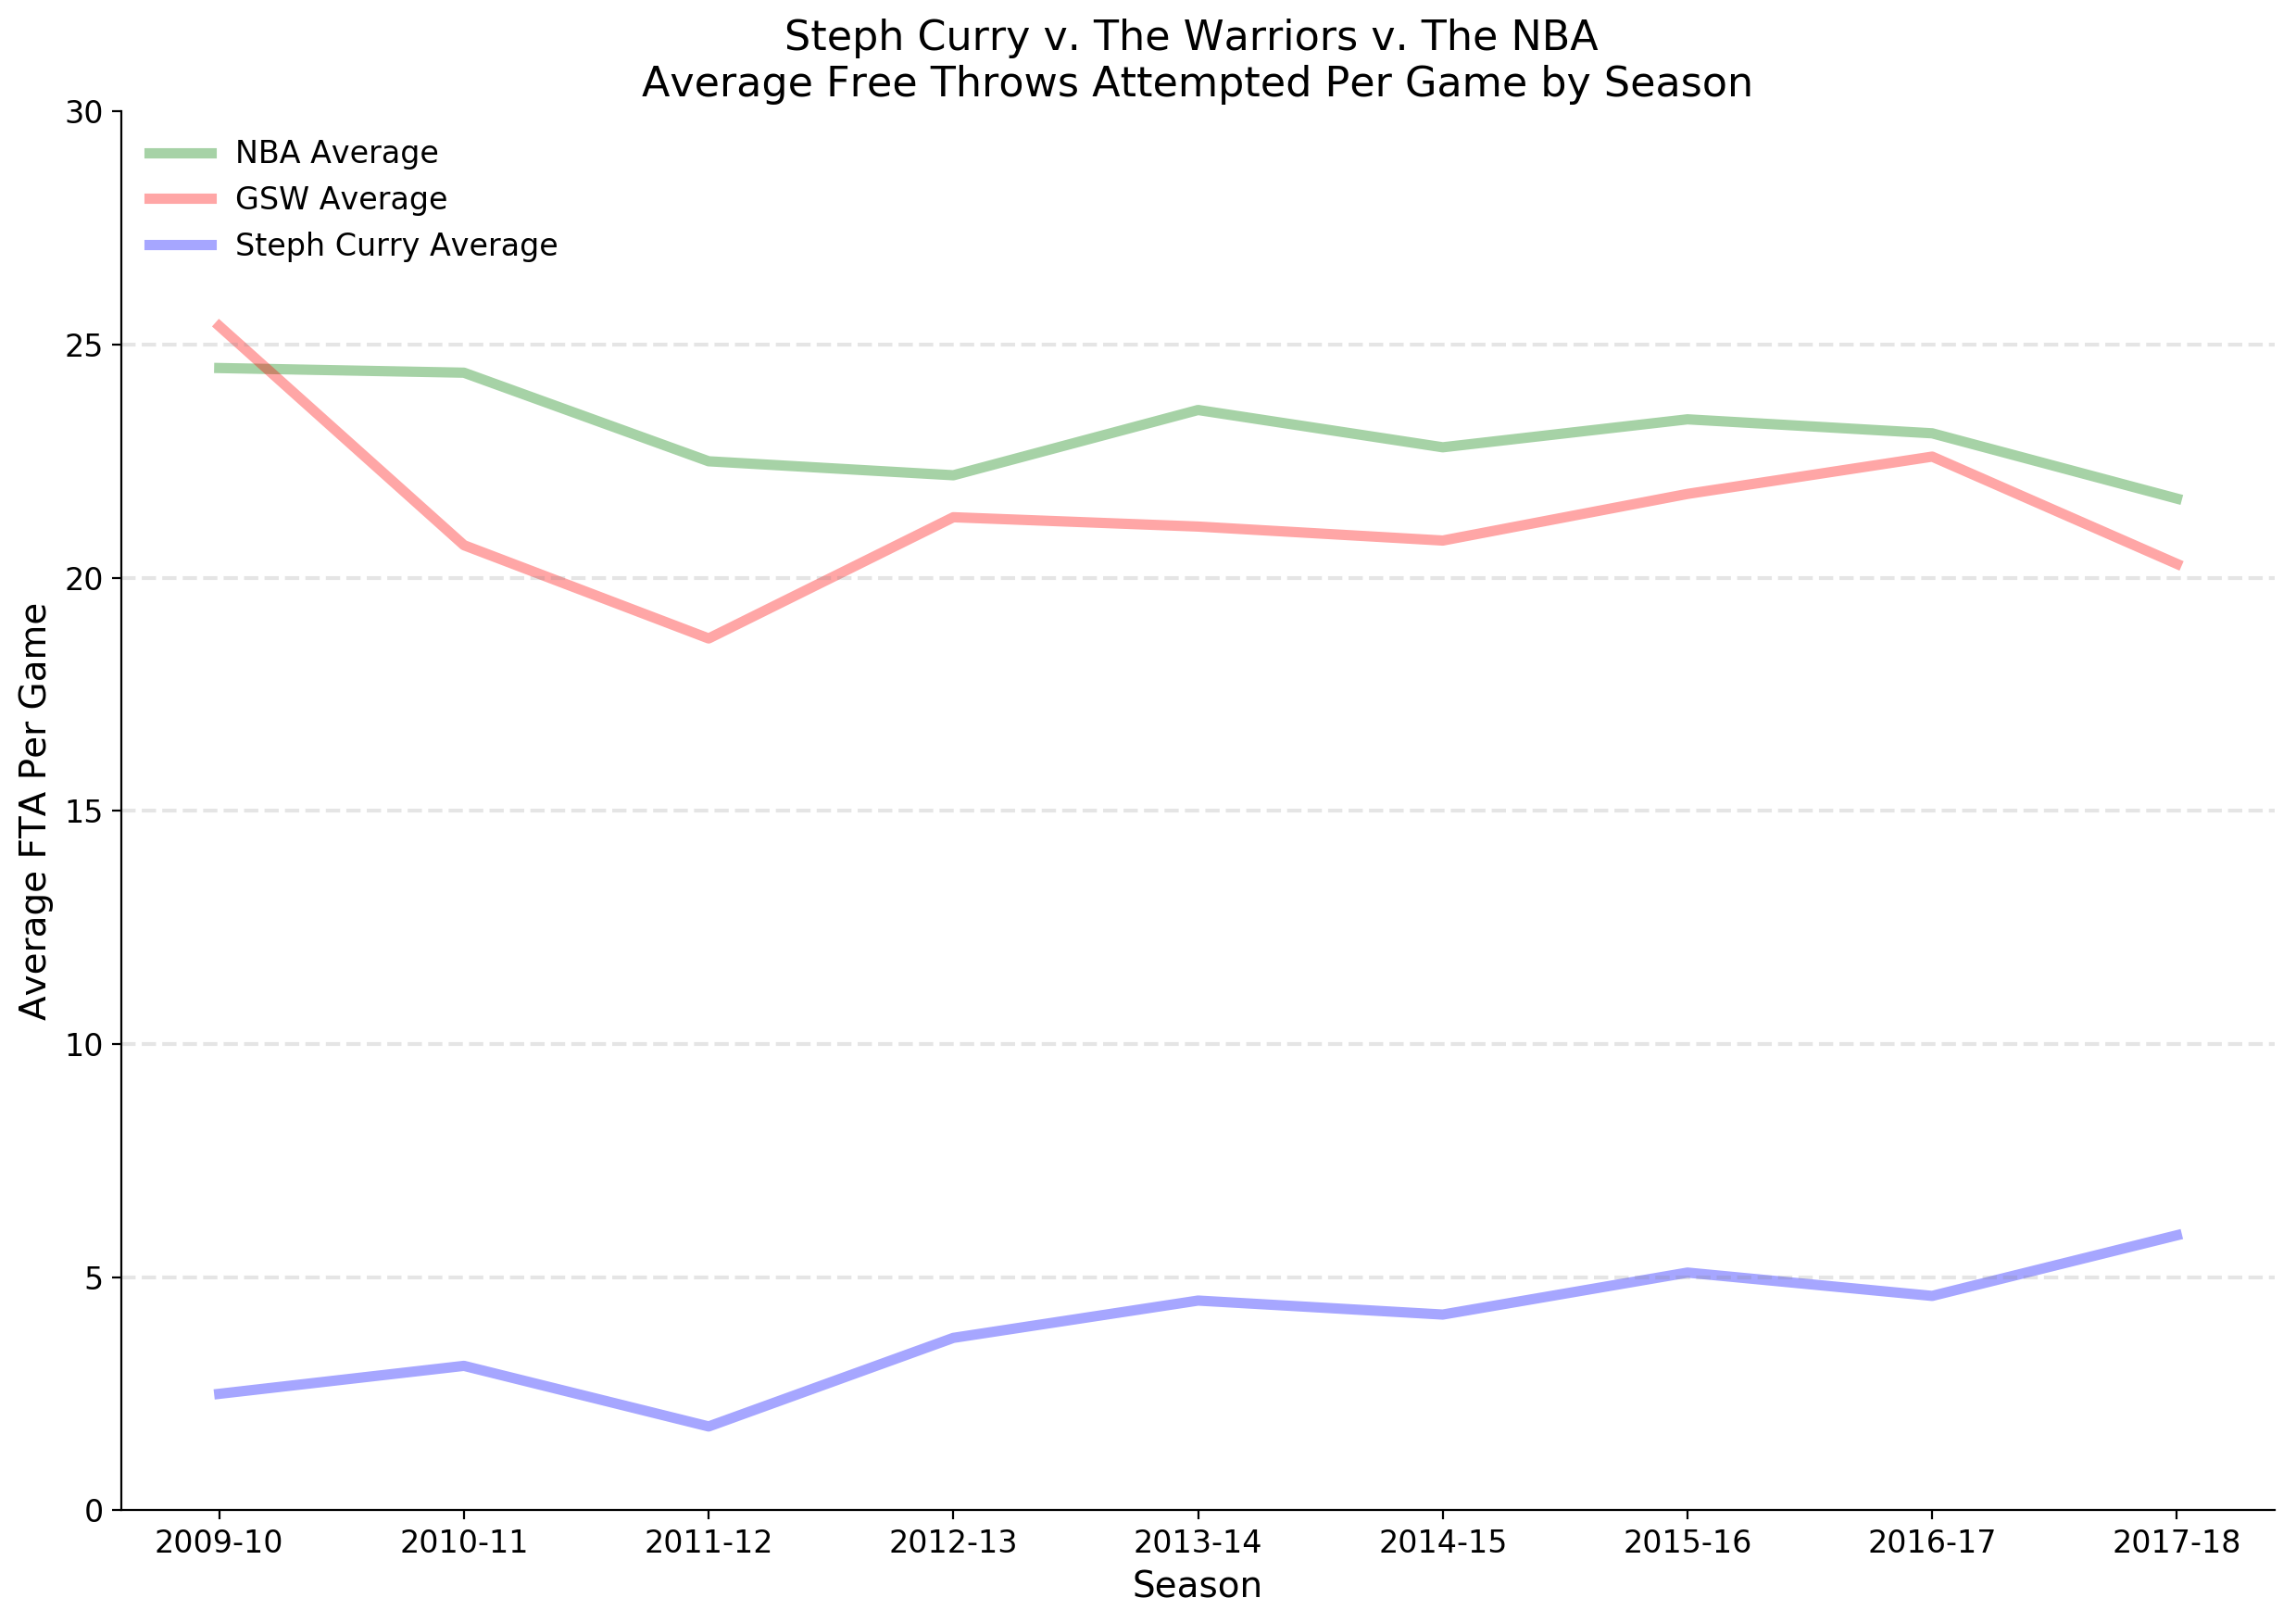

In [12]:
# Let's Plot!
plt.figure(figsize=(15,10), dpi= 200 )


plt.plot(league_df3['FTA'], 'g', alpha = 0.35, label = 'NBA Average', linewidth = 4)
plt.plot(warriors_df3['FTA'], 'r', alpha = 0.35, label = 'GSW Average', linewidth = 4)
plt.plot(steph_df3['FTA'], 'b', alpha = 0.35, label = 'Steph Curry Average', linewidth = 4)

plt.legend(loc = 'upper left',frameon = False, fontsize = 12)
plt.title('Steph Curry v. The Warriors v. The NBA \nAverage Free Throws Attempted Per Game by Season', fontsize = 16)
plt.xlabel('Season', fontsize = 14)
plt.ylabel('Average FTA Per Game', fontsize = 14)
plt.ylim([0, 30])
plt.yticks(np.arange(0, 35, 5), fontsize = 12)
plt.xticks(fontsize = 12)
for y in range(5, 30, 5):    
    plt.axhline(y=y, color='grey',alpha = .2, linestyle='--') 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

With the exception of the 2011-12 season (lockout season), there seems to be a trend with both the NBA and the Golden State Warriors where Free Throw attempts are decreasing. Because most shooting foul calls occur closer to the rim, the increase in Three Pointers attempted and subsequent decrease in Free Throws attempted is expected.

Surprisingly however, Steph Curry's Free Throw attempts per game seem to be trending up. This can be attributed to defenders trying to chase Steph off of the Three-Point line more often. When defenders close-out hard on the three-point line, Steph most likely sees more opportunities to attack the rim, thus causing a greater chance to draw a foul and attempt more free throws.